<a href="https://colab.research.google.com/github/AnnSenina/Python_for_CL/blob/main/notebooks/Python_11_n_gramms_%D0%B4%D0%BE%D0%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Сначала спарсим текст и займемся его препроцессингом

Если скачивать долго: готовые данные можно скачать [отсюда](https://www.kaggle.com/datasets/ashishsinhaiitr/lord-of-the-rings-text)

Kaggle - требует регистрации, однако невероятно полезен!

In [ ]:
#!pip install requests 
# !pip install beautifulsoup4 

import requests as rq
from bs4 import BeautifulSoup

In [ ]:
url = 'https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-j-tolkien-the-lord-of-the-rings.html'
page = rq.get(url) 
print(page) # посмотрим на код ответа, если 200, все хорошо

<Response [200]>


In [ ]:
soup = BeautifulSoup(page.text, features="html.parser") #сохраним результат в переменную soup
print(soup.prettify()) # показывает нашу страницу в красивом виде

<!DOCTYPE doctype html>
<html lang="ru">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <title>
   J. Tolkien ★ The Lord of the Rings читать книгу онлайн бесплатно
  </title>
  <meta content="J. R. R. Tolkien The Lord of the Rings читать онлайн бесплатно без регистрации целиком и полностью весь текст книги на английском языке, а так же прочесть краткое содержание, аннотацию и отзывы о произведении на LibClub.Ru" name="description"/>
  <meta content="J. Tolkien The Lord of the Rings читать онлайн, The Lord of the Rings книга, читать The Lord of the Rings онлайн бесплатно" name="keywords"/>
  <meta content="Читать онлайн" property="og:site_name"/>
  <meta content="article" property="og:type"/>
  <meta content="J. Tolkien: The Lord of the Rings" property="og:title"/>
  <meta content="https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-j-tolkien-the-lord-of-the-rings.html" property="og:url"/>
  <meta content="Читать книгу онлайн беспла

In [ ]:
text = []
for i in soup.find_all("p"):
  text.append(i.text)

text[8:-5]

['The Lord of the Rings',
 'Three Rings for the Elven-kings under the sky,',
 'Seven for the Dwarf-lords in their halls of stone,',
 'Nine for Mortal Men doomed to die,',
 'One for the Dark Lord on his dark throne',
 'In the Land of Mordor where the Shadows lie.',
 'One Ring to rule them all, One Ring to find them,',
 'One Ring to bring them all and in the darkness bind them',
 'In the Land of Mordor where the Shadows lie.',
 'NOTE ON THE TEXT',
 'J.R.R. Tolkien’s The Lord of the Rings is often erroneously called a trilogy, when it is in fact a single novel, consisting of six books plus appendices, sometimes published in three volumes.',
 'The first volume, The Fellowship of the Ring, was published in Great Britain by the London firm George Allen & Unwin on 29 July 1954; an American edition followed on 21 October of the same year, published by Houghton Mifflin Company of Boston. In the production of this first volume, Tolkien experienced what became for him a continual problem: printer

In [ ]:
all_links = ['https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-j-tolkien-the-lord-of-the-rings.html']
for i in range(2, 393):
  link = 'https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-' + str(i) + '-j-tolkien-the-lord-of-the-rings.html#text'
  all_links.append(link)
len(all_links)

392

In [ ]:
all_links

Внимание! Парсить будем минут 5!

Идеальное время для вопросов

In [ ]:
text = []
for i in all_links:
  url = i
  page = rq.get(url) 
  soup = BeautifulSoup(page.text, features="html.parser") 
  for sent in soup.find_all("p")[8:-5]:
    text.append(sent.text)

text
#print(text)

['The Lord of the Rings',
 'Three Rings for the Elven-kings under the sky,',
 'Seven for the Dwarf-lords in their halls of stone,',
 'Nine for Mortal Men doomed to die,',
 'One for the Dark Lord on his dark throne',
 'In the Land of Mordor where the Shadows lie.',
 'One Ring to rule them all, One Ring to find them,',
 'One Ring to bring them all and in the darkness bind them',
 'In the Land of Mordor where the Shadows lie.',
 'NOTE ON THE TEXT',
 'J.R.R. Tolkien’s The Lord of the Rings is often erroneously called a trilogy, when it is in fact a single novel, consisting of six books plus appendices, sometimes published in three volumes.',
 'The first volume, The Fellowship of the Ring, was published in Great Britain by the London firm George Allen & Unwin on 29 July 1954; an American edition followed on 21 October of the same year, published by Houghton Mifflin Company of Boston. In the production of this first volume, Tolkien experienced what became for him a continual problem: printer

In [ ]:
text_str = ' '.join(text)
text_str
#print(text_str)

##Препроцессим с NLTK

In [ ]:
# все то, что надо импортировать из NLTK
#!pip install nltk

import nltk

from nltk.tokenize import word_tokenize, wordpunct_tokenize

from nltk import download
download('punkt')

download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian') 

from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("russian")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# собрала препроцессинг в 1 функцию - пока только до стемминга, лемматизация по плану в следующий раз
def clean_text(text_str):
  text_str = text_str.lower() # нижний регистр
  text_list_nltk = word_tokenize(text_str) # токенизация
  stop_words = stopwords.words('english') 
  text_without_punkt = [word for word in text_list_nltk if word[0].isalpha()] # удалить пунктуацию из списка токенов
  text_clean = [word for word in text_without_punkt if word not in stop_words] # чистим от стоп-слов
  text_stemmed = [stemmer.stem(word) for word in text_clean] # стемминг
  return text_stemmed

full_text = clean_text(text_str)

In [ ]:
full_text
#print(full_text)

['lord',
 'rings',
 'three',
 'rings',
 'elven-kings',
 'sky',
 'seven',
 'dwarf-lords',
 'halls',
 'stone',
 'nine',
 'mortal',
 'men',
 'doomed',
 'die',
 'one',
 'dark',
 'lord',
 'dark',
 'throne',
 'land',
 'mordor',
 'shadows',
 'lie',
 'one',
 'ring',
 'rule',
 'one',
 'ring',
 'find',
 'one',
 'ring',
 'bring',
 'darkness',
 'bind',
 'land',
 'mordor',
 'shadows',
 'lie',
 'note',
 'text',
 'j.r.r',
 'tolkien',
 'lord',
 'rings',
 'often',
 'erroneously',
 'called',
 'trilogy',
 'fact',
 'single',
 'novel',
 'consisting',
 'six',
 'books',
 'plus',
 'appendices',
 'sometimes',
 'published',
 'three',
 'volumes',
 'first',
 'volume',
 'fellowship',
 'ring',
 'published',
 'great',
 'britain',
 'london',
 'firm',
 'george',
 'allen',
 'unwin',
 'july',
 'american',
 'edition',
 'followed',
 'october',
 'year',
 'published',
 'houghton',
 'mifflin',
 'company',
 'boston',
 'production',
 'first',
 'volume',
 'tolkien',
 'experienced',
 'became',
 'continual',
 'problem',
 'printer

# Готово! Вернемся к частотам

In [ ]:
from collections import Counter
Counter(full_text).most_common(50)
#print(Counter(full_text).most_common(50))

[('said', 4386),
 ('frodo', 2103),
 ('great', 1438),
 ('came', 1426),
 ('sam', 1358),
 ('could', 1296),
 ('long', 1276),
 ('come', 1264),
 ('would', 1251),
 ('gandalf', 1231),
 ('one', 1209),
 ('like', 1187),
 ('go', 1081),
 ('many', 1031),
 ('back', 1016),
 ('still', 1003),
 ('away', 986),
 ('men', 944),
 ('last', 914),
 ('far', 913),
 ('upon', 910),
 ('see', 905),
 ('us', 893),
 ('dark', 837),
 ('yet', 837),
 ('aragorn', 826),
 ('time', 825),
 ('old', 812),
 ('went', 784),
 ('even', 759),
 ('way', 748),
 ('seemed', 745),
 ('may', 742),
 ('well', 739),
 ('must', 739),
 ('pippin', 722),
 ('shall', 713),
 ('know', 688),
 ('looked', 665),
 ('little', 652),
 ('eyes', 645),
 ('hobbits', 633),
 ('merry', 627),
 ('light', 610),
 ('king', 601),
 ('saw', 595),
 ('thought', 579),
 ('though', 575),
 ('road', 565),
 ('ring', 551)]

Вспомним, что не так с нашими частотами?

##Облако слов

In [ ]:
!pip install wordcloud

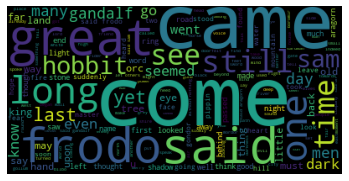

In [ ]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#%matplotlib inline

# Генерируем облако слов
wordcloud = WordCloud().generate(', '.join(full_text))
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

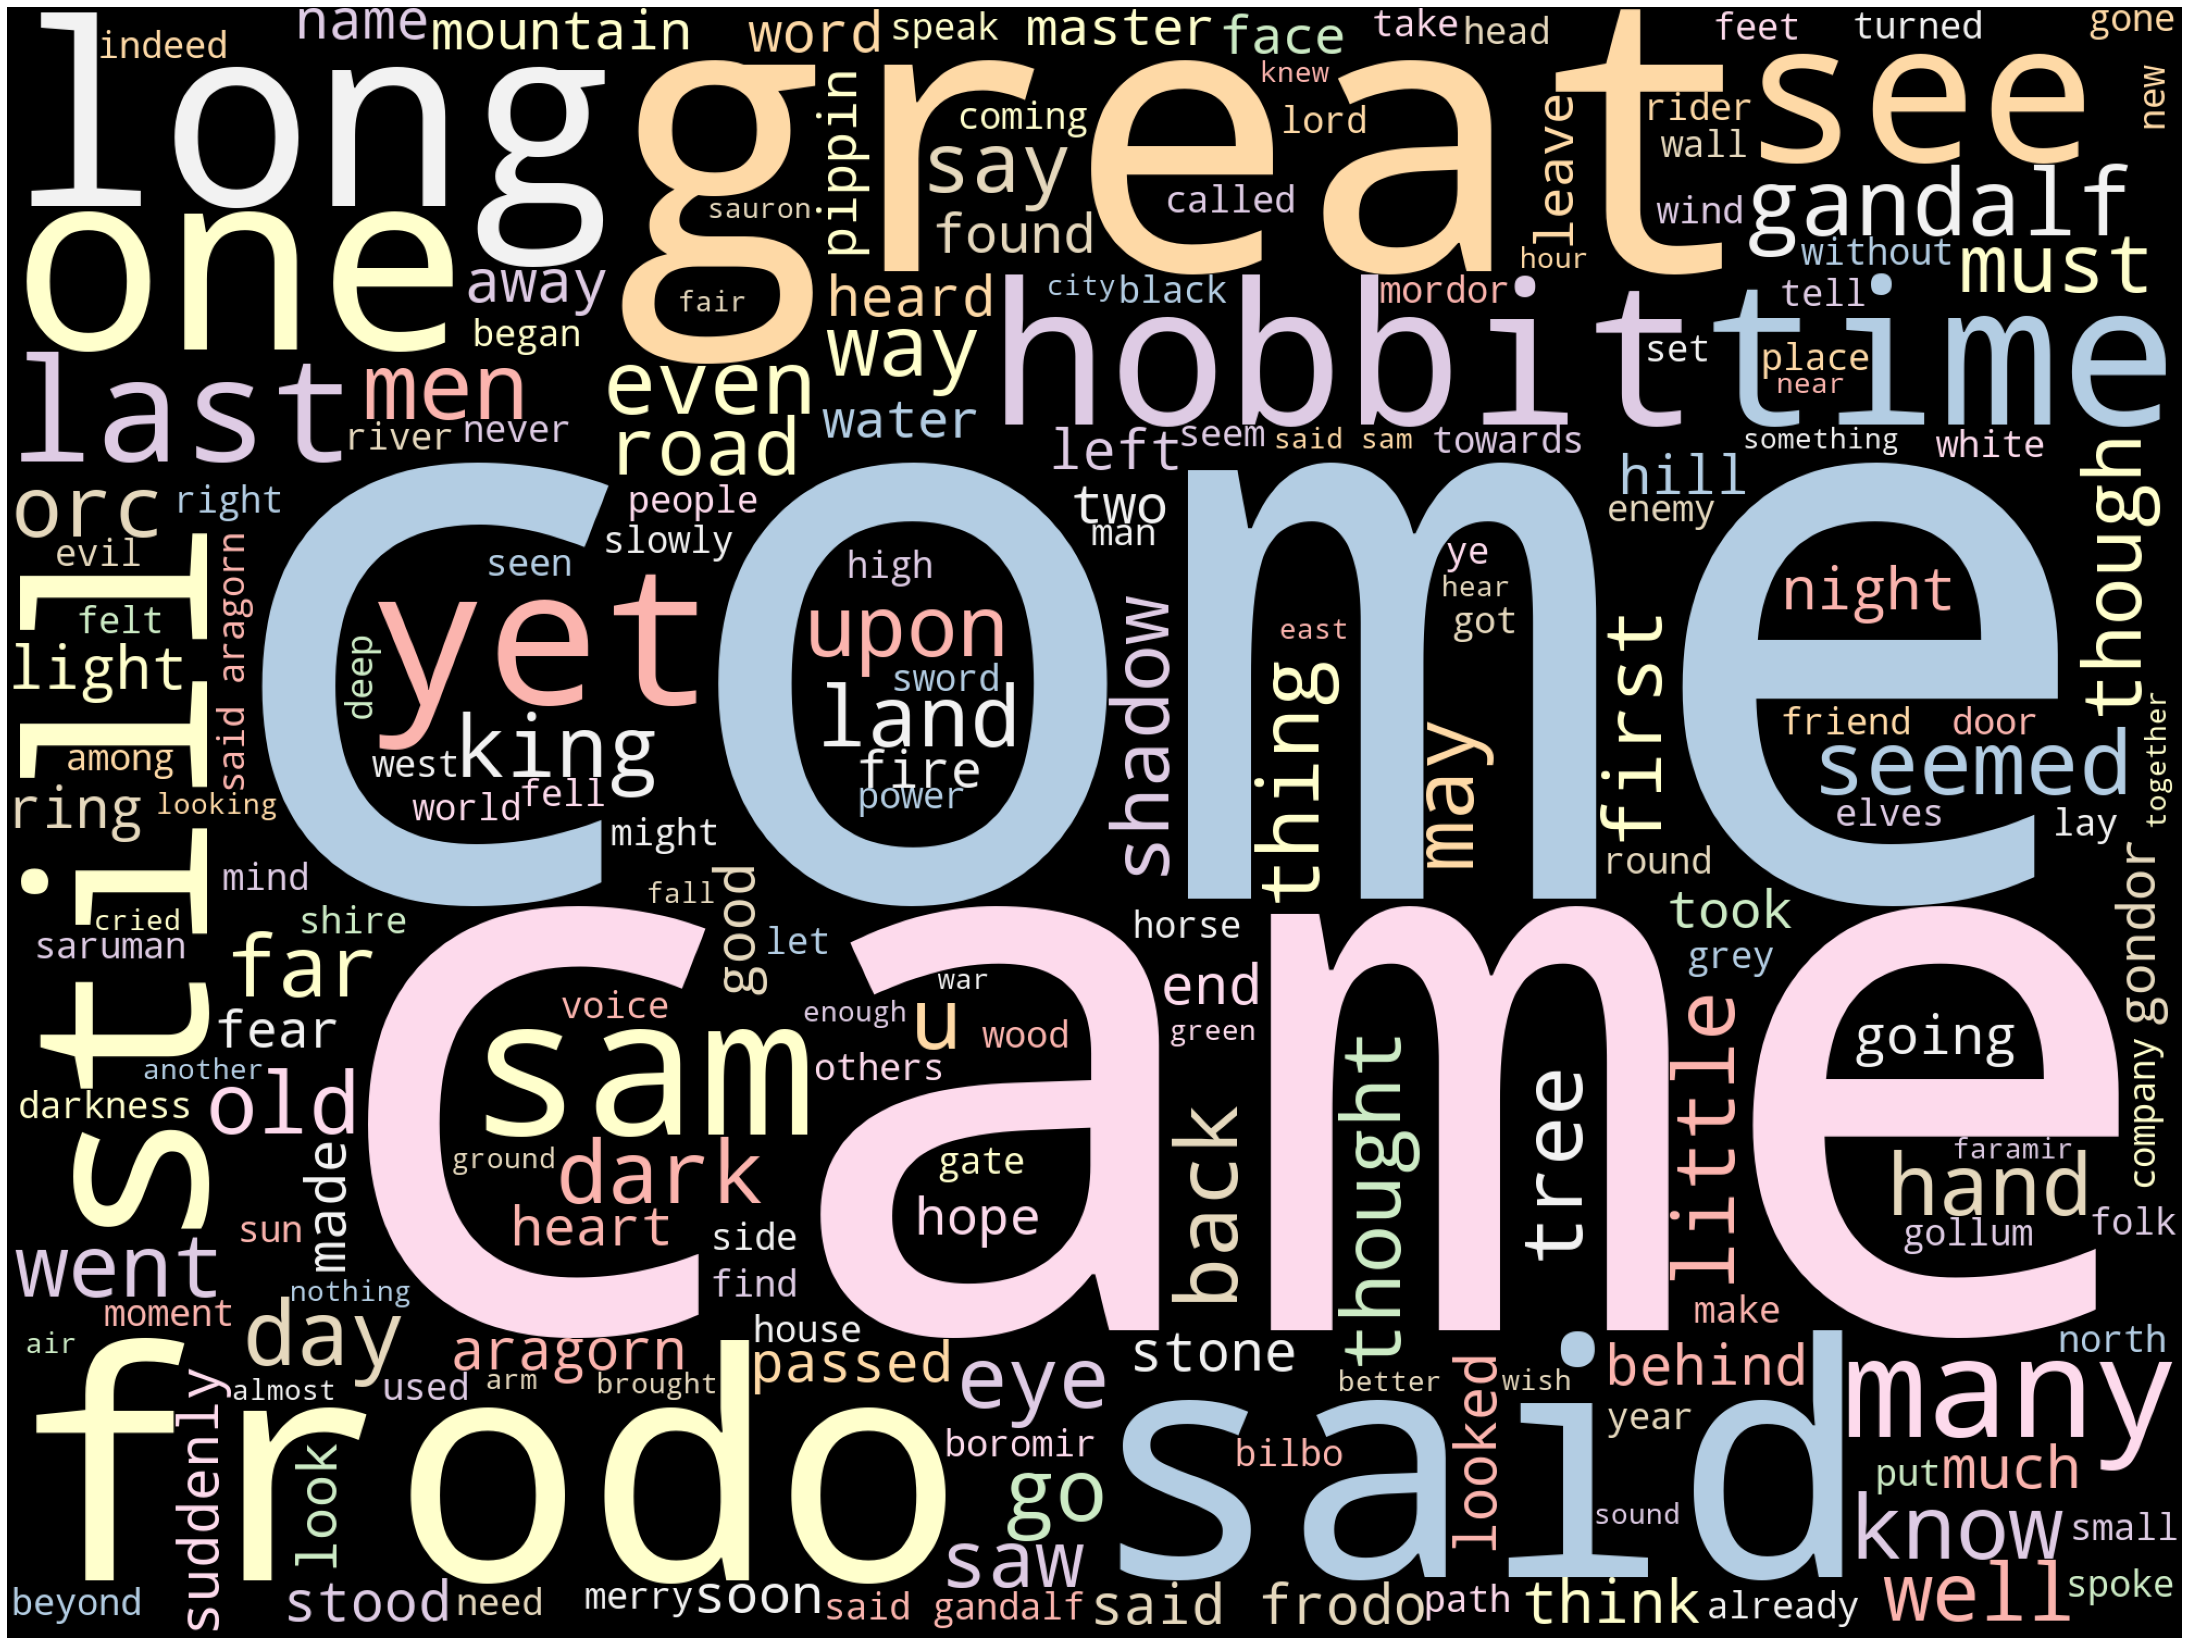

In [ ]:
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      background_color='black', 
                      colormap='Pastel1').generate(', '.join(full_text))
plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

Палитры:

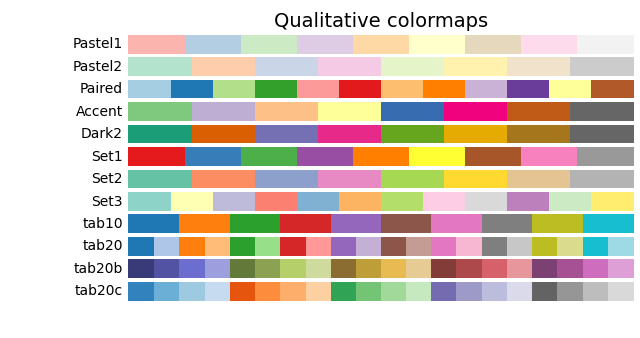

### Задание

In [ ]:
cloud = '''В любой непонятной ситуации дата-сайентист визуализирует данные: это, среди прочего, облегчает поиск инсайтов и формулирование гипотез для проверки.
Облако слов — визуализация текстовых данных на стыке исследовательского анализа, инфографики и дата-дизайна. Это самый первый и быстрый взгляд на большие и слабо структурированные тексты: художественные, научные, информационные.
Главные причины использовать облако слов:
Во-первых, это красиво — удачная визуализация украшает портфолио.
Во-вторых, облако показывает самые популярные слова текста, что полезно для быстрой его оценки.
Например, для школьного сочинения или текста в разговорном стиле это могут оказаться слова-паразиты (от таких неплохо бы избавляться), а для научных или «инфостильных» текстов — слова, больше относящиеся к содержанию.
В-третьих, сделать такую визуализацию совсем не сложно — и сейчас вы сами в этом убедитесь.
Мы будем работать в блокноте Google Colab — то есть прямо в браузере, код напишем на языке Python, а текст возьмём из «Википедии». Если что-то пойдёт не так — всегда можно свериться с нашим блокнотом: все ссылки есть в конце статьи.'''

# текст отсюда https://skillbox.ru/media/code/vizualiziruy-eto-oblako-slov-na-python/

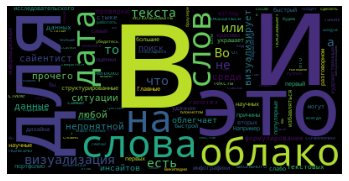

In [ ]:
# ваш код


###Задание 2

Сначала предобработайте этот текст, затем создайте облако слов

In [ ]:
# ваш код
# Генерируем облако слов
wordcloud = WordCloud().generate(cloud)
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

###Частотный анализ

Многие компьтерные методы анализа текста основаны на статистике — в нашем случае это частотность символов / словоформ / лексем / биграмм / триграмм / частей речи и т.д., ее отношение к длине текста, средняя длина текстов и т.д.

Зачем нам знать частотность слов в тексте? Например, она говорит о том, какие слова наиболее характеры для того или иного текста. Сравнивая частотные слова в разных текстах можно определить степень их близости, классифицировать по жанру, теме и т.п., а также выявить явления, характерные для языка в целом.

Подход, когда текст представляется просто как куча слов, без информации об их порядке, называется bag of words.


### Закон Ципфа

**Закон Ципфа** («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (т.н. рангу этого слова). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и т.д.

**Если закон Ципфа соблюдается — значит, перед нами нормальный текст на естественном языке. Если нет, то что-то с ним не так.**

### Закон Хипса

**Закон Хипса** — эмпирическая закономерность в лингвистике, описывающая распределение числа уникальных слов в документе (или наборе документов) как функцию от его длины. 

**Чем больше коллекция текстов, тем меньше новых токенов появляется с её пополнением**

##Способы считать частоту

### Абсолютная частота слова
Количество употреблений слова в тексте. Она не всегда уместна.


###UPD! Предлагаю работать с новыми текстами

In [ ]:
# все то, что надо импортировать из NLTK
#!pip install nltk

import nltk

from nltk.tokenize import word_tokenize, wordpunct_tokenize

from nltk import download
download('punkt')

download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian') 

from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("russian")

# собрала препроцессинг в 1 функцию - пока только до стемминга
def clean_text(text_str):
  text_str = text_str.lower() # нижний регистр
  text_list_nltk = word_tokenize(text_str) # токенизация
  stop_words = stopwords.words('russian') 
  text_without_punkt = [word for word in text_list_nltk if word[0].isalpha()] # удалить пунктуацию из списка токенов
  text_clean = [word for word in text_without_punkt if word not in stop_words] # чистим от стоп-слов
  #text_stemmed = [stemmer.stem(word) for word in text_clean] # стемминг
  return ' '.join(text_clean)

In [ ]:
with open('bananafish.txt', 'r', encoding='utf-8') as file:
  bananafish = file.read()
bananafish = bananafish.replace('\ufeff', '')
bananafish = bananafish.replace('\xa0', ' ')
bananafish = clean_text(bananafish)
bananafish

In [ ]:
with open('Uncle.txt', 'r', encoding='utf-8') as file:
  uncle = file.read()
uncle = uncle.replace('\ufeff', '')
uncle = uncle.replace('\xa0', ' ')
uncle = clean_text(uncle)
uncle

In [ ]:
with open('Eskimos.txt', 'r', encoding='utf-8') as file:
  eskimos = file.read()
eskimos = eskimos.replace('\ufeff', '')
eskimos = eskimos.replace('\xa0', ' ')
eskimos = clean_text(eskimos)
eskimos

### Относительная частота слова
это отношение его абсолютной частоты к какой-нибудь другой величине, например, к длине текста или корпуса. Существуют разные способы подсчета относительной частоты. 

### IPM
Для сравнения частот в разных коллекциях текстов популярен $ipm$ *(items per million)* - отношение абсолютной частоты какого-либо элемента к объему корпуса, умноженное на миллион.

$$ ipm_{word} = \dfrac{f_{word}}V_{corpus} \        \times \  1,000,000 $$ 

Например, если текст состоит из 500 слов, и слово "котик" встречается там 50 раз, то 

$$ ipm_{котик} = \dfrac{50}{500} \       \times \  1,000,000 \     = 100,000 $$ 

Метрика IPM позволяет сравнивать тексты через их характеристики. Например, "Я" заметно чаще встречается в корпусе любительской литературы, чем в корпусе художественных произведений из НКРЯ.

Кстати, есть библиотеки с подсчетом ipm
* [разные языки](https://pypi.org/project/wordfreq/)
* отдельно [русский язык](https://pypi.org/project/ruword-frequency/)


In [ ]:
!pip install wordfreq

In [ ]:
# как часто слово "ring" встречается в корпусе английского языка?
from wordfreq import zipf_frequency
ipm = zipf_frequency('человек', 'ru')
print(ipm)

In [ ]:
# а как часто - в нашем тексте?
print(bananafish.count("человек") / len(full_text) * 1000000)

Для русского языка

In [ ]:
!pip install ruword-frequency

In [ ]:
from ruword_frequency import Frequency
freq = Frequency()
freq.load()

freq.ipm('человек')
# ближе к тексту! Но не намного

### TF-IDF

Tf-Idf - способ высоко оценить слова, которые одновременно
* показательны в документе
* не вездесущи в корпусе документов


Наивная идея такая: давайте оценка слова будет 
* увеличиваться, если оно частотно в документе
* уменьшаться, если оно встречается во многих документах

В таком противостоянии победят те слова, которые выделяют документы из многих им подобных.




###Пример с использованием sklearn

Документация [здесь](https://scikit-learn.org/stable/)

Сначала простой пример

In [ ]:
import math
example1 = 'в этом документе десять слов и одно из них человек'.split()
example2 = 'а в этом такого слова нет'.split()
example3 = 'а здесь слова человек снова есть есть человек в этом документе'.split()

print('tf слова "человек" в первом документе', example1.count('человек')/len(example1))
print('tf слова "человек" во втором документе', example2.count('человек')/len(example2))
print('tf слова "человек" во третьем документе', example3.count('человек')/len(example3))

print('idf для слова человек', math.log10(3/2))
# количество документов, в которых слово есть
# делим на кооличество документов, в котором слова нет

print('tf-idf слова "человек" в первом документе', example1.count('человек')/len(example1) * math.log10(3/2))
print('tf-idf слова "человек" во втором документе', example2.count('человек')/len(example2) * math.log10(3/2))
print('tf-idf слова "человек" во третьем документе', example3.count('человек')/len(example3) * math.log10(3/2))


Давайте считать tf-idf с помощью библиотеки sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [59]:
corpus = ['Three Rings for the Elven-kings under the sky',
          'Seven for the Dwarf-lords in their halls of stone',
          'Nine for Mortal Men doomed to die',
          'One for the Dark Lord on his dark throne',
          'In the Land of Mordor where the Shadows lie',
          'One Ring to rule them all', 
          'One Ring to find them',
          'One Ring to bring them all and in the darkness bind them',
          'In the Land of Mordor where the Shadows lie']

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(corpus)
print(tfidf)

In [ ]:
tfidf.shape
# предположите, что означают эти числа?

In [ ]:
tfidf.todense() # матрица
#print(tfidf.todense() # матрица)

In [ ]:
tfidf_vectorizer.vocabulary_ # словарь - не частотный!
#print(tfidf_vectorizer.vocabulary_)

In [ ]:
words = tfidf_vectorizer.get_feature_names_out()
words
#print(words)

In [ ]:
import pandas as pd

data = tfidf.todense().tolist() 
lotr = pd.DataFrame(data, columns = words)
lotr
#print(lotr)

In [66]:
lotr.to_csv("lotr_tfidf.csv")

#Вернемся к Сэлинджеру

In [113]:
corpus = [bananafish, uncle, eskimos]

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(corpus)
print(tfidf)

In [ ]:
tfidf.shape

In [ ]:
tfidf.todense() # матрица
#print(tfidf.todense() # матрица)

In [ ]:
tfidf_vectorizer.vocabulary_ # словарь - не частотный!
#print(tfidf_vectorizer.vocabulary_)

In [ ]:
words = tfidf_vectorizer.get_feature_names_out()
words
#print(words)

In [ ]:
# постараемся оставить только относительно важные слова
tfidf_vectorizer = TfidfVectorizer(min_df = 0.9, max_df = 5) # Ограничиваем порог встречаемости слова в текстах
tfidf = tfidf_vectorizer.fit_transform(corpus)
words = tfidf_vectorizer.get_feature_names_out()

print(words)

##N-gramms
Текст можно разделить на n-граммы – устойчивые сочетания по N слов:

    nltk.bigrams() – сочетания по два слова
    nltk.trigrams() – сочетания по три слова
    nltk.ngrams(list, n) – сочетания по N слов

In [ ]:
import nltk

freq_bigramms = Counter(nltk.bigrams(bananafish.split()))
freq_bigramms.most_common(10)

In [ ]:
freq_bigramms = Counter(nltk.bigrams(uncle.split()))
freq_bigramms.most_common(10)

In [ ]:
freq_bigramms = Counter(nltk.bigrams(eskimos.split()))
freq_bigramms.most_common(10)